In [1]:
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from scipy.stats import gaussian_kde

In [2]:
# GRB250702D
filename = 'GRB250702D.fit'
map_data = hp.read_map(filename, verbose=False)

# Get indices of HEALPix pixels
nside = hp.get_nside(map_data)
indices = np.arange(len(map_data))

# dec and ra
delta, alpha = hp.pix2ang(nside, indices)

# Normalize probabilities (for KDE weights)
probabilities = map_data / np.sum(map_data)

# Create a 2D Gaussian KDE
coords = np.vstack([alpha, delta])
kde_GRB250702D = gaussian_kde(coords, weights=probabilities)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_95187/1609195148.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map(filename, verbose=False)


In [3]:
# GRB250702B
filename = 'GRB250702B.fit'
map_data = hp.read_map(filename, verbose=False)

# Get indices of HEALPix pixels
nside = hp.get_nside(map_data)
indices = np.arange(len(map_data))

delta, alpha = hp.pix2ang(nside, indices)

# Normalize probabilities (for KDE weights)
probabilities = map_data / np.sum(map_data)

# Create a 2D Gaussian KDE
coords = np.vstack([alpha, delta])
kde_GRB250702B = gaussian_kde(coords, weights=probabilities)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_95187/1364693288.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map(filename, verbose=False)


In [4]:
# GRB250702B
filename = 'GRB250702E.fit'
map_data = hp.read_map(filename, verbose=False)

# Get indices of HEALPix pixels
nside = hp.get_nside(map_data)
indices = np.arange(len(map_data))

delta, alpha = hp.pix2ang(nside, indices)

# Normalize probabilities (for KDE weights)
probabilities = map_data / np.sum(map_data)

# Create a 2D Gaussian KDE
coords = np.vstack([alpha, delta])
kde_GRB250702E = gaussian_kde(coords, weights=probabilities)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_95187/2360944319.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map(filename, verbose=False)


In [5]:
delta_grid = np.linspace(0, np.pi, 100)  # Declination grid
alpha_grid = np.linspace(0, 2 * np.pi, 100)  # Right Ascension grid
alpha_grid, delta_grid = np.meshgrid(alpha_grid, delta_grid)

# Create a grid of coordinates for evaluation
grid_coords = np.vstack([alpha_grid.ravel(), delta_grid.ravel()])

# Evaluate KDE on the grid
density_GRB250702D = kde_GRB250702D(grid_coords).reshape(alpha_grid.shape)
density_GRB250702B = kde_GRB250702B(grid_coords).reshape(alpha_grid.shape)
density_GRB250702E = kde_GRB250702E(grid_coords).reshape(alpha_grid.shape)

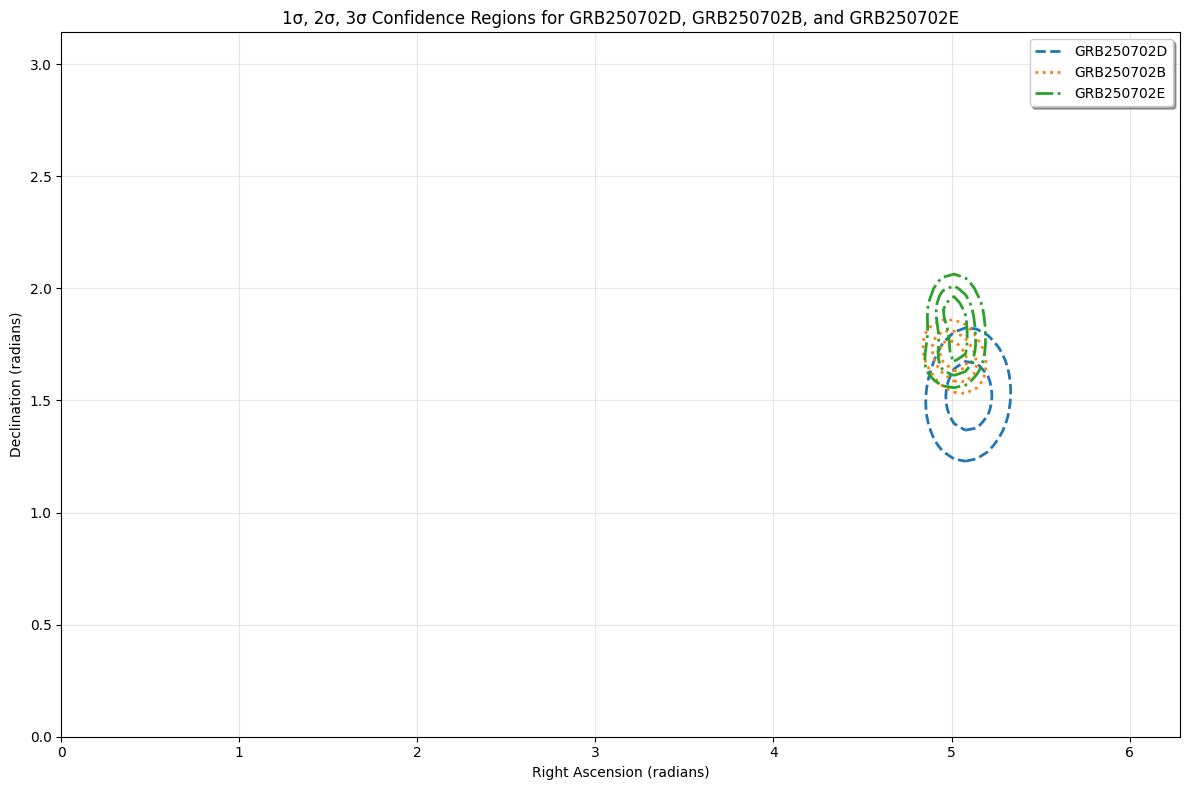

In [6]:
# Plot the overlapping contour KDE plots for GRB250702D, GRB250702B, and GRB250702E in the same figure
# with only 1, 2, 3 sigma regions
plt.figure(figsize=(12, 8))

# Define levels corresponding to 1, 2, 3 sigma confidence intervals
# For 2D Gaussian distributions: 1σ ≈ 39%, 2σ ≈ 86%, 3σ ≈ 99%
levels = [0.39, 0.86, 0.99]

contour1 = plt.contour(alpha_grid, delta_grid, density_GRB250702D, levels=3, colors='C0', linewidths=2, linestyles='dashed')
contour2 = plt.contour(alpha_grid, delta_grid, density_GRB250702B, levels=3, colors='C1', linewidths=2, linestyles='dotted')
contour3 = plt.contour(alpha_grid, delta_grid, density_GRB250702E, levels=3, colors='C2', linewidths=2, linestyles='dashdot')

# Create legend with manual entries
plt.plot([], [], color='C0', linestyle='dashed', linewidth=2, label='GRB250702D')
plt.plot([], [], color='C1', linestyle='dotted', linewidth=2, label='GRB250702B')
plt.plot([], [], color='C2', linestyle='dashdot', linewidth=2, label='GRB250702E')

plt.xlabel('Right Ascension (radians)')
plt.ylabel('Declination (radians)')
plt.title('1σ, 2σ, 3σ Confidence Regions for GRB250702D, GRB250702B, and GRB250702E')
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

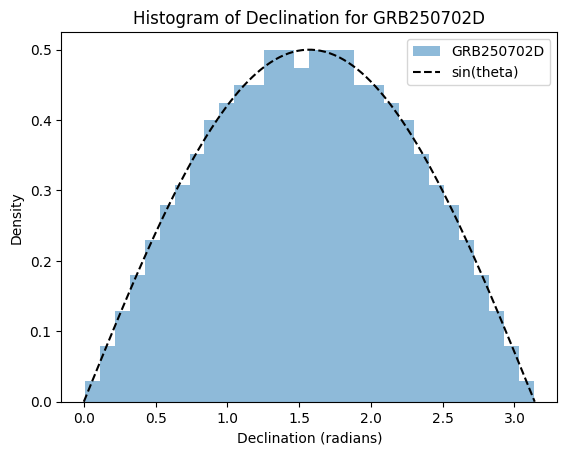

In [ ]:
plt.hist(delta, bins=30, density=True, alpha=0.5, label='GRB250702D', color='C0')
plt.plot(np.linspace(0, np.pi, 100), np.sin(np.linspace(0, np.pi, 100))/2, color='black', linestyle='--', label='sin(delta)')
plt.xlabel('Declination (radians)')
plt.ylabel('Density')
plt.title('Histogram of Declination for GRB250702D')
plt.legend()
plt.show()

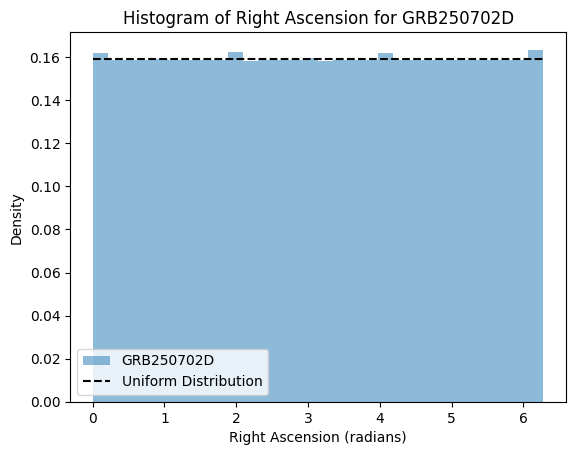

In [ ]:
plt.hist(alpha, bins=30, density=True, alpha=0.5, label='GRB250702D', color='C0')
plt.plot(np.linspace(0, 2 * np.pi, 100), np.ones(100) / (2 * np.pi), color='black', linestyle='--', label='Uniform Distribution')
plt.xlabel('Right Ascension (radians)')
plt.ylabel('Density')
plt.title('Histogram of Right Ascension for GRB250702D')
plt.legend()
plt.show()

In [10]:
p_alpha = lambda x: 1/(2 * np.pi)  # Uniform distribution for RA
p_delta = lambda x: np.sin(x) / 2  # Uniform distribution for Dec

# Bayes Factor Calculation of sky maps for GRB250702D, GRB250702B, and GRB250702E

$$
\begin{align}
{\rm BF} &= \int_0^{2\pi} \int_{0}^{\pi} \frac{P(\alpha, \delta\mid d_1)\, P_2(\alpha, \delta\mid d_2)\, P_3(\alpha, \delta\mid d_3)\, d\delta\, d\alpha}{(P(\alpha)\, P(\delta))^2} \\
&= \int_0^{2\pi} \int_{0}^{\pi} \frac{P(\alpha, \delta\mid d_1)\, P_2(\alpha, \delta\mid d_2)\, P_3(\alpha, \delta\mid d_3)\, d\delta\, d\alpha}{(P(\alpha)\, P(\delta))^2} \frac{P_o(\alpha)\, P_o(\delta)}{P_o(\alpha)\, P_o(\delta)} \\
&= \Big\langle \frac{P(\alpha, \delta\mid d_1)\, P_2(\alpha, \delta\mid d_2)\, P_3(\alpha, \delta\mid d_3)}{(P(\alpha)\, P(\delta))^2 \, P_o(\alpha)\, P_o(\delta)} \Big\rangle_{P_o(\alpha)\, P_o(\delta)} \\
&= 2\pi^2 \, \Big\langle \frac{P(\alpha, \delta\mid d_1)\, P_2(\alpha, \delta\mid d_2)\, P_3(\alpha, \delta\mid d_3)}{(P(\alpha)\, P(\delta))^2} \Big\rangle_{P_o(\alpha)\, P_o(\delta)}
\end{align}
$$

where $P_o$ is the uniform distribution over the interval

In [ ]:
num_samples = 10000
alpha = np.random.uniform(0, 2 * np.pi, num_samples)  # RA in radians
delta = np.random.uniform(0, np.pi, num_samples)  # Dec in radians
# Generate a grid for evaluation
input = np.vstack([alpha, delta])

p_alpha_delta_d1 = kde_GRB250702D(input)
p_alpha_delta_d2 = kde_GRB250702B(input)
p_alpha_delta_d3 = kde_GRB250702E(input)

In [12]:
# monte carlo integration
BF = 2*np.pi**2 * np.average( 
    (p_alpha_delta_d1 * p_alpha_delta_d2 * p_alpha_delta_d3) / 
    (p_alpha(alpha) * p_delta(delta))**2
    )
print(f"Bayes Factor: {BF:.4f}")
print(f"log10 BF: {np.log10(BF):.4f}") 

Bayes Factor: 1390.3137
log10 BF: 3.1431
